<h2>Artificial Neural Network</h2>

In [3]:
import torch
import pickle
import matplotlib.pyplot as plt

In [4]:
w=torch.tensor(1.0, requires_grad=True)

In [5]:
a=w*3

In [6]:
I=a**2

<b>I=a^2=(3*w)^2=9w^2</b>

In [7]:
I.backward()
print("I derivative of w: ", w.grad)

I derivative of w:  tensor(18.)


<h3>Recovering broken image</h3>
<p>This code refered to 펭귄브로의 3분 딥러닝 (파이토치)</p>

<p>variable 'broekn_image' is made by weird_function(origianl_image).<br>
   Suppose that weird dunction is function that revises original image but somehow it is not working well.<br>
    Purpose of this code is to restore original image using gradient descent.

</p>

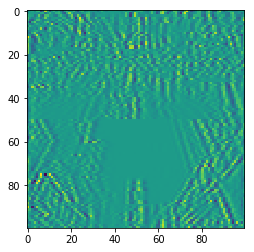

In [11]:
#broken image is from 3-min-pytorch github
broken_image=torch.FloatTensor(pickle.load(open('./broken_image_t.p', 'rb'), encoding='latin1'))
plt.imshow(broken_image.view(100,100))

In [24]:
def weird_function(original_image, n_iter=5):
    h=original_image
    filt=torch.tensor([-1./3, 1./3, -1./3])
    for i in range(n_iter):
        zero_tensor=torch.tensor([1.0*0])
        h_l=torch.cat((zero_tensor, h[:-1]),0)
        h_r=torch.cat((h[1:], zero_tensor),0)
        h=filt[0]*h+filt[2]*h_l+filt[1]*h_r
        if i%2==0:
            h=torch.cat((h[h.shape[0]//2:], h[:h.shape[0]//2]),0)
    return h

In [41]:
random_tensor=torch.randn(10000, dtype=torch.float)

In [42]:
random_tensor

tensor([ 0.6995,  0.4125, -1.4203,  ..., -0.1027,  0.7175,  0.5709])

In [43]:
def grad_descent(random_image, target_image, lr=0.8, iteration=10000):
    for i in range(iteration):
        random_image.requires_grad_(True)
        revised_image=weird_function(random_image)
        loss=torch.dist(revised_image, target_image)
        loss.backward()
        with torch.no_grad():
            random_image-=lr*random_image.grad
        if i%1000==0:
            print("loss at {}: {}".format(i, loss.item()))
    plt.imshow(random_image.view(100,100).data)
    return random_image

loss at 0: 12.397188186645508
loss at 1000: 8.302252769470215
loss at 2000: 8.195405960083008
loss at 3000: 8.30626106262207
loss at 4000: 8.235875129699707
loss at 5000: 8.28122615814209
loss at 6000: 8.317145347595215
loss at 7000: 8.300037384033203
loss at 8000: 8.140228271484375
loss at 9000: 8.147525787353516
loss at 10000: 8.271018028259277
loss at 11000: 8.113064765930176
loss at 12000: 8.293827056884766
loss at 13000: 8.219929695129395
loss at 14000: 8.203189849853516
loss at 15000: 8.257979393005371
loss at 16000: 8.27155876159668
loss at 17000: 8.275248527526855
loss at 18000: 8.255176544189453
loss at 19000: 8.279899597167969


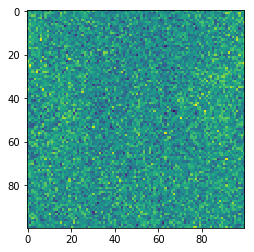

In [44]:
random_tensor=grad_descent(random_tensor, broken_image, lr=0.8,iteration=20000)

<p>Since loss doesn't decrease since 1000th(or lesser) iteration, revised grad_descent()</p>

In [76]:
def grad_descent_with_gradual_lr(random_image, target_image, lr=0.8, iteration=10000):
    loss_dict={}
    for i in range(iteration):
        random_image.requires_grad_(True)
        revised_image=weird_function(random_image)
        loss=torch.dist(revised_image, target_image)
        loss.backward()
        with torch.no_grad():
            random_image-=lr*random_image.grad
        if i%500==0:
            loss_dict[i]=loss.item()
            print("loss at {} with lr of {}: {}".format(i, lr, loss.item()))
            if(i!=0): #to prevent error
                if (abs(list(loss_dict.values())[-1]-list(loss_dict.values())[-2])<1):
                    lr*=0.5
    plt.imshow(random_image.view(100,100).data)
    return random_image

In [77]:
random_tensor2=torch.randn(10000, dtype=torch.float)

loss at 0 with lr of 0.8: 12.01271915435791
loss at 500 with lr of 0.8: 7.927024841308594
loss at 1000 with lr of 0.8: 8.120708465576172
loss at 1500 with lr of 0.4: 6.6386399269104
loss at 2000 with lr of 0.4: 6.717094898223877
loss at 2500 with lr of 0.2: 5.601498603820801
loss at 3000 with lr of 0.2: 5.600850582122803
loss at 3500 with lr of 0.1: 4.62583065032959
loss at 4000 with lr of 0.05: 4.036351203918457
loss at 4500 with lr of 0.025: 3.3345446586608887
loss at 5000 with lr of 0.0125: 2.797283887863159
loss at 5500 with lr of 0.00625: 2.3365797996520996
loss at 6000 with lr of 0.003125: 1.9587982892990112
loss at 6500 with lr of 0.0015625: 1.5635972023010254
loss at 7000 with lr of 0.00078125: 1.1764963865280151
loss at 7500 with lr of 0.000390625: 0.9483984112739563
loss at 8000 with lr of 0.0001953125: 0.7748181223869324
loss at 8500 with lr of 9.765625e-05: 0.592950165271759
loss at 9000 with lr of 4.8828125e-05: 0.5045150518417358
loss at 9500 with lr of 2.44140625e-05: 0.

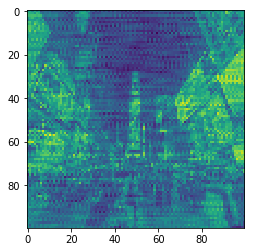

In [78]:
random_tensor2=grad_descent_with_gradual_lr(random_tensor2, broken_image)

In [80]:
with open("Resotored-pickle1.plk", 'wb') as fout:
    pickle.dump(random_tensor2, fout, protocol=pickle.HIGHEST_PROTOCOL)

In [86]:
from torchvision.utils import save_image
save_image(random_tensor2.view(100,100).data, "Restored_picture1.png")